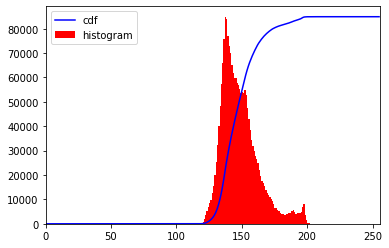

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg') # cv2.IMREAD_COLOR (default) / cv2.IMREAD_GRAYSCALE / cv2.IMREAD_UNCHANGED
# img = cv2.imread('lung.jpg')

# 히스토그램 생성하기
hist, bins = np.histogram(img, 256, [0,256])
# print(hist)
# print(bins)

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max() # 정규화 해주는 이유 => 히스토그램과 같은 스케일로 표현하기 위함

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img)
cv2.waitKey()

cv2.destroyAllWindows()

개선된 명도 사람이 직접 percent를 설정해줘야한다는 것 단점
민맥스 극도로 크거나 작은 값이 하나라도 존재한다면 제대로 스트래칭 되지 않음

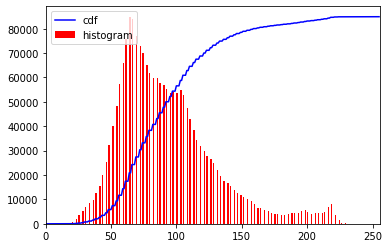

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# min-max stretching 수행하기
img_minmax = (img - img.min()) / (img.max() - img.min()) * 255.0
img_minmax = img_minmax.astype(np.uint8)

# 히스토그램 생성하기
hist, bins = np.histogram(img_minmax, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_minmax.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img_minmax)
cv2.waitKey()

cv2.destroyAllWindows()

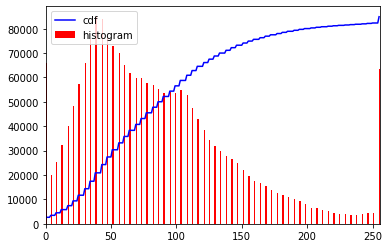

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


    
def percentile_stretching(img, p_low, p_high): 
    
    
    low = np.percentile(img, p_low)
    high = np.percentile(img, p_high)
    
    img_ptile = (img - low) / (high - low) * 255.0
    img_ptile[img_ptile < 0] = 0
    img_ptile[img_ptile > 255] = 255.0
    
    img_ptile = img_ptile.astype(np.uint8)

    return img_ptile
    

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# percentile stretching 수행하기
img_percentile = percentile_stretching(img, 3, 97)

# 히스토그램 생성하기
hist, bins = np.histogram(img_percentile, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_percentile.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img_percentile)
cv2.waitKey()

cv2.destroyAllWindows()

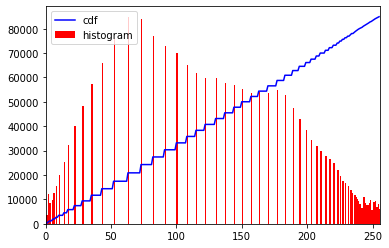

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# 히스토그램 평활화 수행하기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)
img_equalized = cv2.merge([equalized, equalized, equalized])

# 히스토그램 생성하기
hist, bins = np.histogram(img_equalized, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_equalized.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img_equalized)
cv2.waitKey()

cv2.destroyAllWindows()